In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [2]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5
using LinearAlgebra

In [ ]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:T, :K, :Lx, :Ly, :Mag, :Energy, :Dxπ, :Dyπ, :P],
)

cleandata (generic function with 1 method)

In [4]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [10]:
jobname = "temp-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])
neg_K_data = subset(data, :K => K -> K .< 0.0, ungroup=false)
pos_K_data = subset(data, :K => K -> K .> 0.0, ungroup=false)

Row,T,K,Lx,Ly,Mag,Energy,Dx0,Dy0,P
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.01,0.001,40,40,0.001582±6.9e-5,-1.9445±0.00044,-0.04099±0.00052,-0.05897±0.00014,0.1247±0.0046
2,0.05,0.001,40,40,0.003326±9.8e-5,-1.94138±0.00022,-0.0684±0.0027,-0.0233±0.0018,0.406±0.012
3,0.1,0.001,40,40,0.005089±8.9e-5,-1.88452±0.00025,-0.0646±0.0011,-0.0627±0.001,0.1553±0.0071
4,0.15,0.001,40,40,0.00632±0.00011,-1.84726±0.00033,-0.00486±0.00039,-0.0046±0.00029,0.223±0.012
5,0.2,0.001,40,40,0.007184±6.8e-5,-1.78714±0.00039,-0.0327±0.0013,-0.0166±0.0012,0.522±0.012
6,0.25,0.001,40,40,0.00814±0.00017,-1.74151±0.00045,-0.00759±0.0006,-0.00783±0.00055,0.514±0.013
7,0.3,0.001,40,40,0.00888±0.00011,-1.68589±0.00038,-0.01077±0.00084,-0.0104±0.00092,0.204±0.022
8,0.35,0.001,40,40,0.00952±0.00012,-1.63118±0.00059,-0.01131±0.00075,-0.01196±0.00088,0.517±0.023
9,0.4,0.001,40,40,0.01024±0.00014,-1.57162±0.00055,-0.01433±0.00069,-0.01343±0.00059,0.345±0.039


In [12]:
fig = generatePlot(
    neg_K_data, :T, :Dxπ;
    title="Dx(π) vs. T",
    xlabel="T",
    ylabel="Dx(π)"
)

ArgumentError: ArgumentError: column name "Dxπ" not found in the data frame; existing most similar names are: "Dx0", "Dy0" and "Lx"

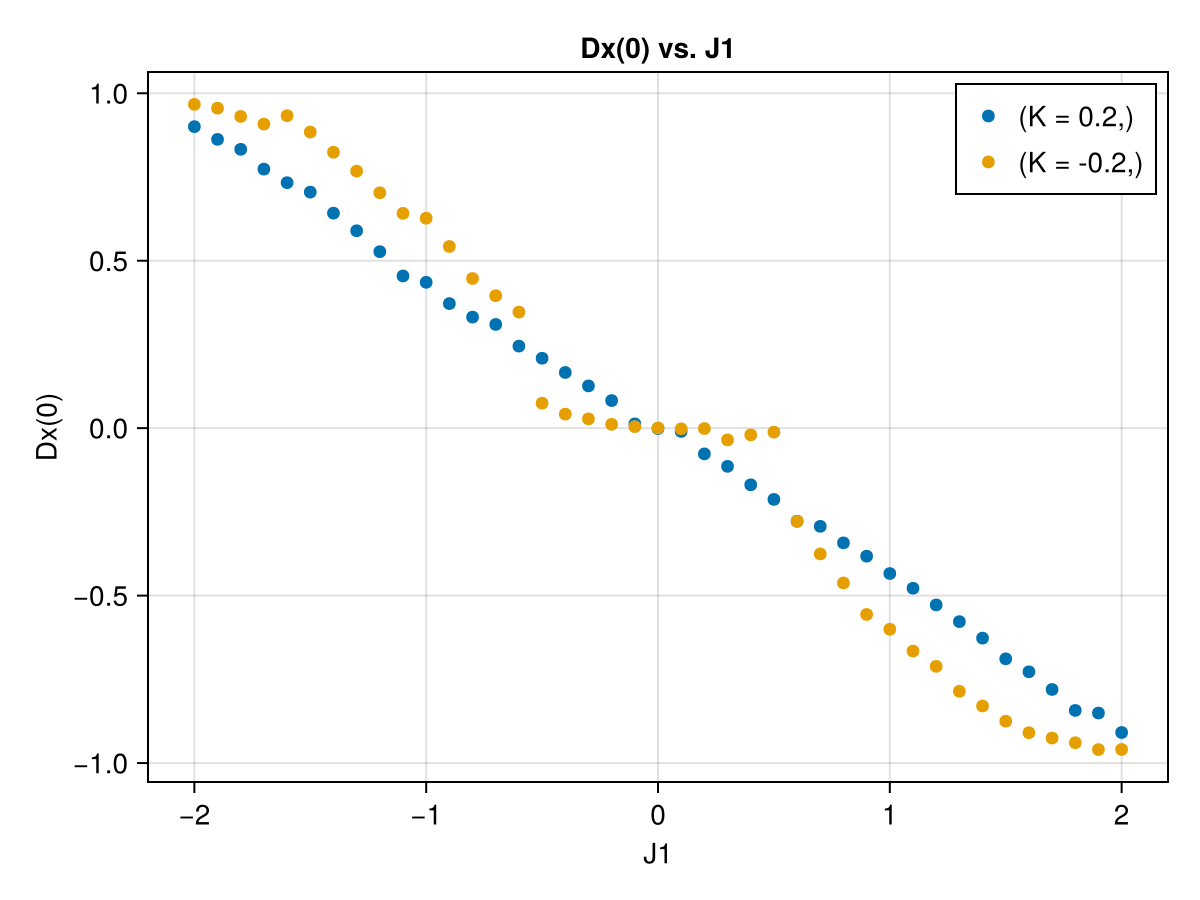

In [7]:
generatePlot(
    data, :J1, :Dx0;
    title="Dx(0) vs. J1",
    xlabel="J1",
    ylabel="Dx(0)"
)

In [8]:
jobname = "j1-fine-sweep"
fine_data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-1.0,0.2,40,40,0.00596±0.00042,-2.39594±0.00094,0.43149±0.00052,0.484±0.0016
2,-0.95,0.2,40,40,0.00804±0.00044,-2.35436±0.00036,0.41856±0.00035,0.49221±0.00027
3,-0.9,0.2,40,40,0.00631±0.00038,-2.32377±0.00029,0.32796±0.0003,0.43944±0.00025
4,-0.85,0.2,40,40,0.00728±0.00036,-2.2691±0.0018,0.33775±0.00047,0.39901±0.00032
5,-0.8,0.2,40,40,0.00602±0.00018,-2.23836±0.00047,0.32819±0.0004,0.37996±0.00025
6,-0.75,0.2,40,40,0.00319±0.00023,-2.20416±0.00041,0.3231±0.00016,0.3608±0.0012
7,-0.7,0.2,40,40,0.00822±0.0004,-2.16171±0.00032,0.29236±0.0003,0.37055±0.00033
8,-0.65,0.2,40,40,0.00616±0.00038,-2.12171±0.00046,0.28682±0.00082,0.31969±0.00067
9,-0.6,0.2,40,40,0.00269±0.00019,-2.13657±0.00036,0.29991±0.0006,0.30213±0.00033


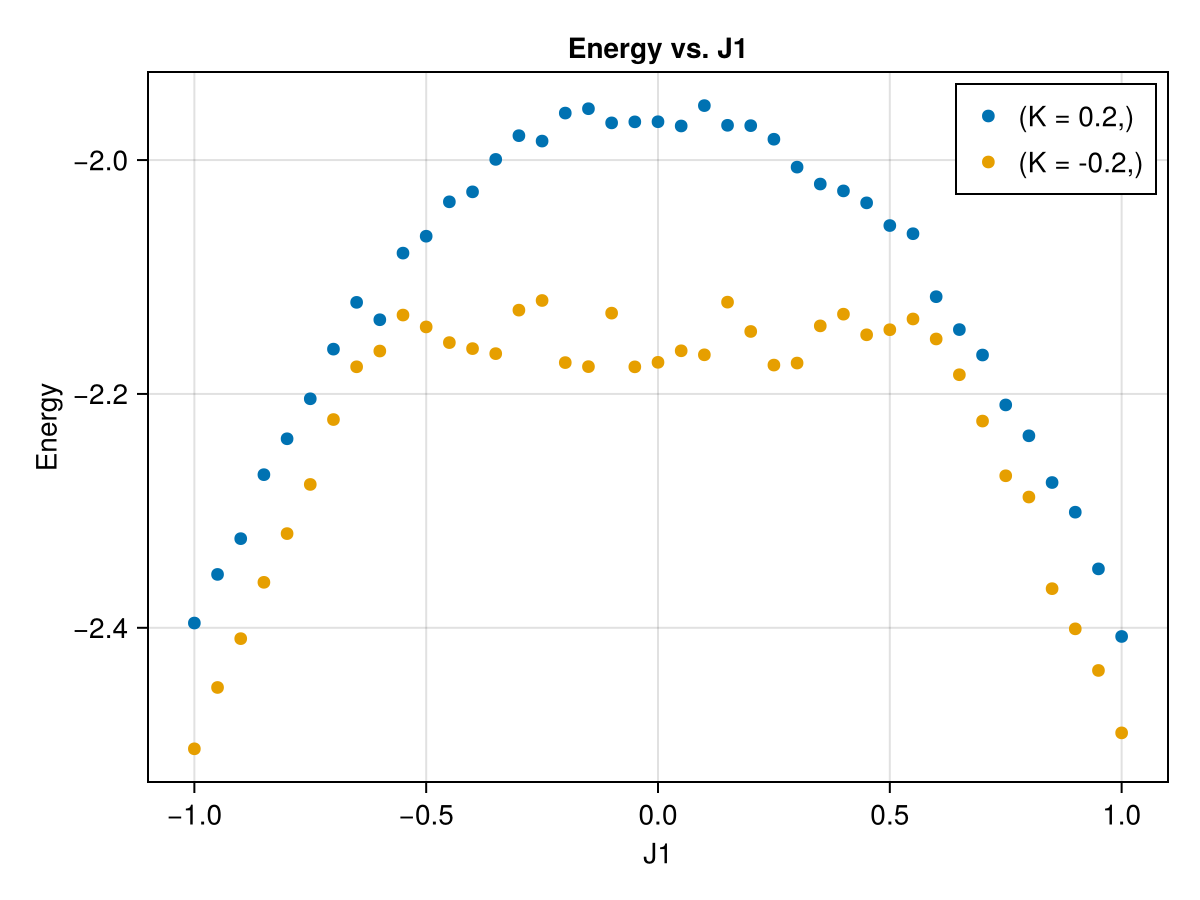

In [9]:
fig = generatePlot(
    fine_data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)
save("j1-energy.png", fig)
fig

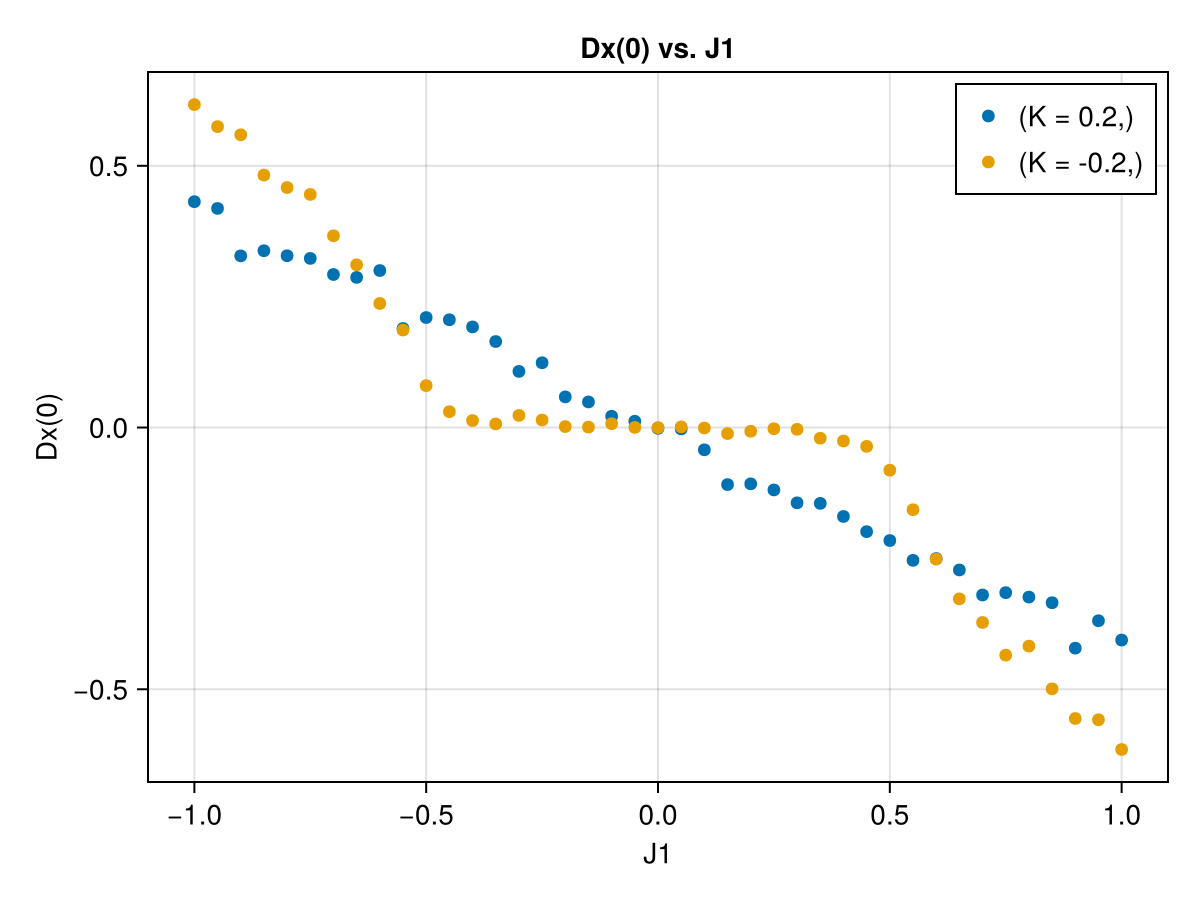

In [10]:
fig = generatePlot(
    fine_data, :J1, :Dx0;
    title="Dx(0) vs. J1",
    xlabel="J1",
    ylabel="Dx(0)"
)
save("j1-Dx0.png", fig)
fig

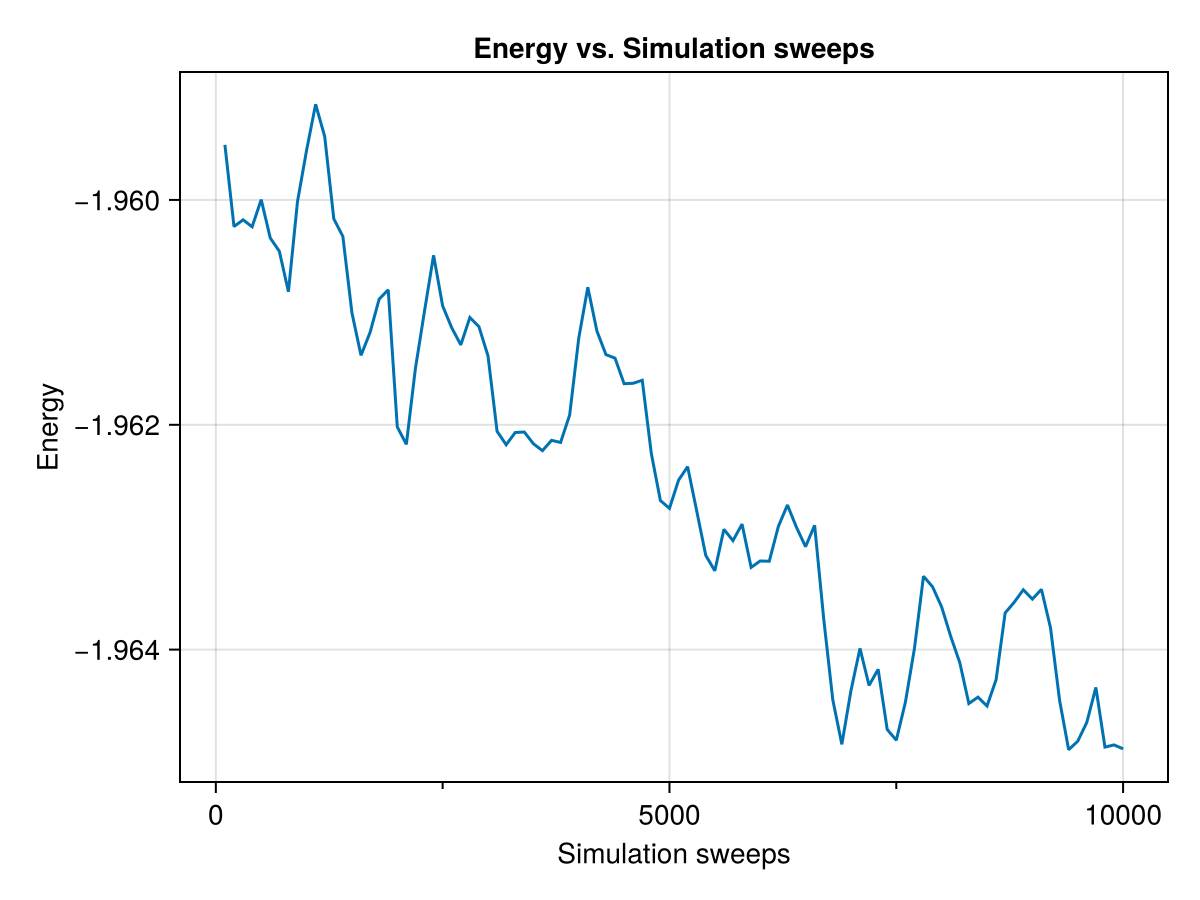

In [14]:
fig = Figure()

ax = fig[1,1] = Axis(
    fig,
    title="Energy vs. Simulation sweeps",
    xlabel="Simulation sweeps",
    ylabel="Energy",
    xminorticksvisible=true
)

task_no = "41"
h5open("../jobs/j1-sweep.data/task00" * task_no * "/run0001.meas.h5") do file
    mag_group = file["observables/Energy"]
    mag_samples = read(mag_group, "samples")
    bin_len = read(mag_group, "bin_length")
    lines!(
        bin_len .* collect(1:length(mag_samples)),
        mag_samples,
        label="T = 2.2435698905536414"
    )
end

fig

In [60]:
task_no = "40"
file = h5open("../jobs/j1-sweep.data/task00" * task_no * "/run0001.dump.h5")
spins = map(
    t -> [t[:data][1], t[:data][2], t[:data][3]],
    read(file, "simulation/spins")
)
spin_xs = map(v -> v[1], spins)
spin_ys = map(v -> v[2], spins)
spin_zs = map(v -> v[3], spins)
Lx, Ly = size(spins)
close(file)

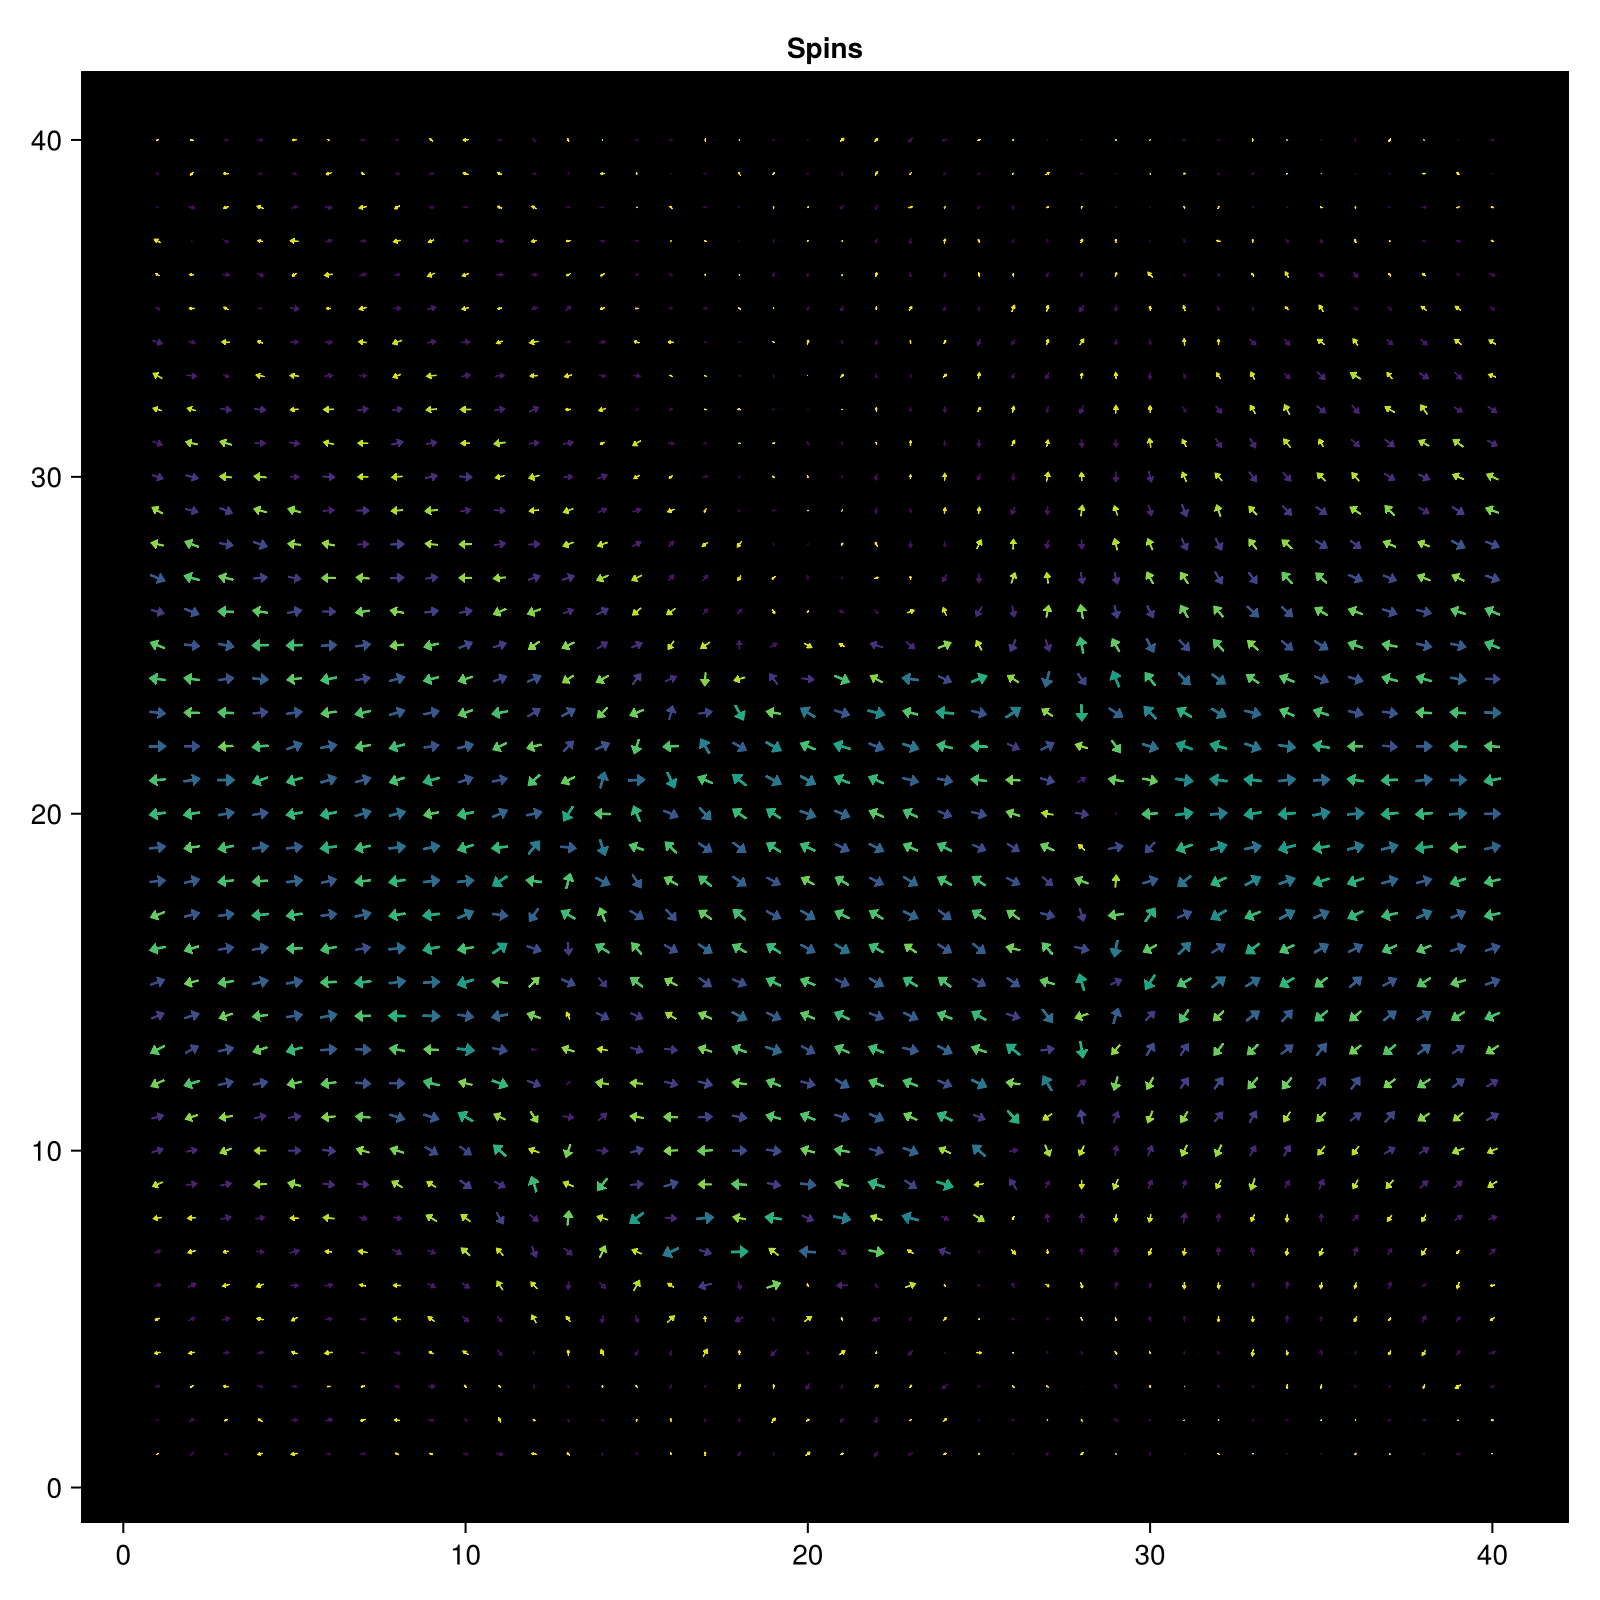

In [61]:
fig = Figure(size=(800, 800))
fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")

strength = vec(spin_zs)
arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength)
fig